In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib notebook

In [2]:
df = pd.read_csv('movies_metadata.csv')

C:\Python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data = pd.DataFrame(df, columns=['revenue', 'title'])
data_sorted = data.sort_values(by='revenue', ascending=False)
data_sorted['revenue'] = data_sorted['revenue'] / 1000000
pd.options.display.float_format = '{:,.0f}'.format
data_sorted.set_index('title', inplace=True)
ranking = data_sorted.head(10)

In [4]:
# Variables
index = ranking.index
values = ranking['revenue']
plot_title = 'Top 10 movies by revenue, USD million'
title_size = 18
subtitle = 'Source: Kaggle / The Movies Dataset'
y_label = 'Revenue, USD million'
filename = 'bar-plot'
labels = ['Beauty & the Beast', 'Frozen', 'HP DH: Part 2', 'Avengers: AU', 'Furious 7', 'Jurassic World', 'The Avengers', 'Titanic', 'Star Wars: The FA', 'Avatar']
x = [0,1,2,3,4,5,6,7,8,9] # number of x-axis ticks

<ipython-input-5-8b5463906398>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking.sort_values(by='revenue', inplace=True, ascending=True)


<IPython.core.display.Javascript object>


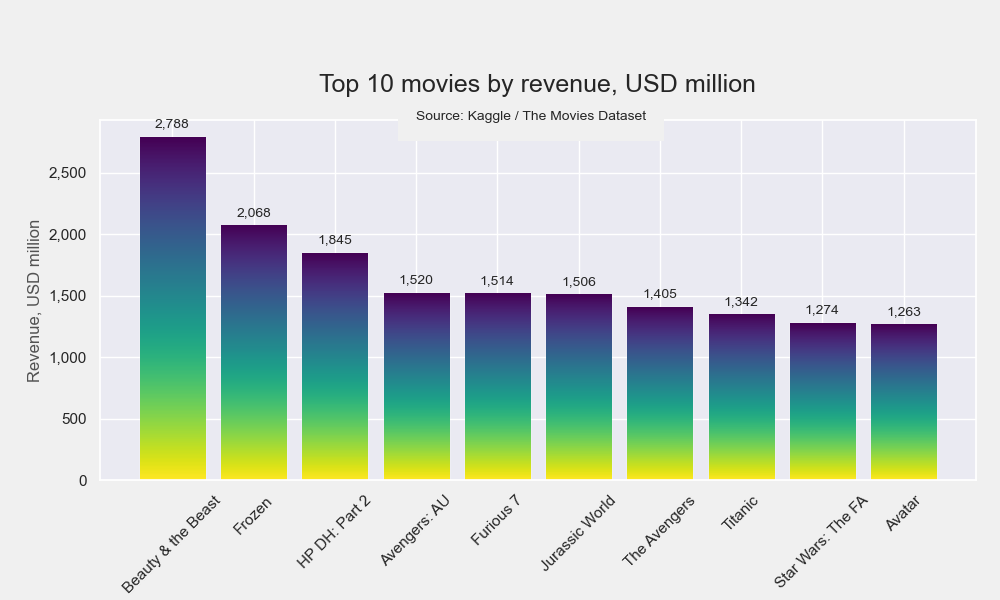

([<matplotlib.axis.XTick at 0x122f4d60>,
 [Text(0, 0, 'Beauty & the Beast'),
  Text(1, 0, 'Frozen'),
  Text(2, 0, 'HP DH: Part 2'),
  Text(3, 0, 'Avengers: AU'),
  Text(4, 0, 'Furious 7'),
  Text(5, 0, 'Jurassic World'),
  Text(6, 0, 'The Avengers'),
  Text(7, 0, 'Titanic'),
  Text(8, 0, 'Star Wars: The FA'),
  Text(9, 0, 'Avatar')])

In [5]:
# Sort values for plotting
ranking.sort_values(by='revenue', inplace=True, ascending=True)

# Facecolor: RGB color codes within 0–1 range
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))

# Set colormap. Other colormaps: plasma, inferno, magma, cividis
mpl.pyplot.viridis()

# Create bars
bar = ax.bar(index, values)
plt.tight_layout()

# Format ticks with commas (like 1,500)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

#Set title, its font size, and position
# pad=15 sets padding
title = plt.title(plot_title, pad=20, fontsize=title_size)
# So that the title and labels don't get cropped
plt.subplots_adjust(top=0.8, bottom=0.2, left=0.1)

# Set grid order to 0 and bar order to 1
# This will hide the grid behind bars 
ax.grid(zorder=0)

# Function that creates gradients
def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256)).T
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x,x+w,y,y+h], aspect='auto', zorder=1)
    ax.axis(lim)

gradientbars(bar)

# Set labels
def add_value_labels(ax, spacing=5):
    # For each bar: place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label; change to your liking
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = '{:,.0f}'.format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords='offset points', # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Call the function above
add_value_labels(ax)      

# Set subtitle
subtitle = 'Source: Kaggle / The Movies Dataset'
tform = ax.get_xaxis_transform()
ann = ax.annotate(subtitle, xy=(3, 1), xycoords=tform, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

# Set x-axis label
ax.set_ylabel(y_label, color='#525252')
plt.xticks(x, labels, rotation=45)

In [6]:
plt.savefig(filename+'.png', facecolor=(.94, .94, .94))